<a href="https://colab.research.google.com/github/SartJ/AI-Fun/blob/main/rickshaw_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [ ]:
img = image.load_img("/content/drive/MyDrive/dhaka_data/train/rikshaw/1.jpg")

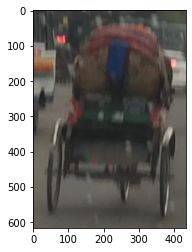

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/dhaka_data/train/rikshaw/1.jpg").shape

(617, 433, 3)

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/dhaka_data/train/', 
                                          target_size=(200,200), 
                                          batch_size=3, 
                                          class_mode='binary')
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/dhaka_data/validation/', 
                                          target_size=(200,200), 
                                          batch_size=3, 
                                          class_mode='binary')

Found 25 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'not_rikshaw': 0, 'rikshaw': 1}

In [ ]:
validation_dataset.class_indices

{'not_rikshaw': 0, 'rikshaw': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [ ]:
import tensorflow as tf


In [ ]:
model = tf.keras.models.Sequential(
    [
     #Convolutional layer
     tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
     #Max Pulling Layer
     tf.keras.layers.MaxPool2D(2,2),
     #Convolutional layer
     tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
     #Max Pulling Layer
     tf.keras.layers.MaxPool2D(2,2),
     #Convolutional layer
     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
     #Max Pooling Layer
     tf.keras.layers.MaxPool2D(2,2),

     #Now we flatten this out
     tf.keras.layers.Flatten(),

     #Then we add two dense layers
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy']
              )

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=3,
                      epochs=200,
                      validation_data=validation_dataset
                      )

Epoch 1/200
3/3 [==============================] - 33s 2s/step - loss: 12.9780 - accuracy: 0.4444 - val_loss: 1.5772 - val_accuracy: 0.5000
Epoch 2/200
3/3 [==============================] - 1s 274ms/step - loss: 2.6754 - accuracy: 0.6667 - val_loss: 0.9386 - val_accuracy: 0.5000
Epoch 3/200
3/3 [==============================] - 0s 81ms/step - loss: 1.0899 - accuracy: 0.4444 - val_loss: 0.7366 - val_accuracy: 0.5000
Epoch 4/200
3/3 [==============================] - 1s 232ms/step - loss: 0.6487 - accuracy: 0.5556 - val_loss: 0.6661 - val_accuracy: 0.7000
Epoch 5/200
3/3 [==============================] - 0s 84ms/step - loss: 1.1352 - accuracy: 0.4444 - val_loss: 0.6866 - val_accuracy: 0.5000
Epoch 6/200
3/3 [==============================] - 0s 122ms/step - loss: 0.4163 - accuracy: 0.8571 - val_loss: 1.1526 - val_accuracy: 0.5000
Epoch 7/200
3/3 [==============================] - 0s 77ms/step - loss: 0.8376 - accuracy: 0.4444 - val_loss: 0.8669 - val_accuracy: 0.5000
Epoch 8/200
3/3 [

In [ ]:
validation_dataset.class_indices

{'not_rikshaw': 0, 'rikshaw': 1}

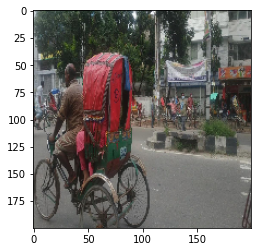

This is not a rickshaw.


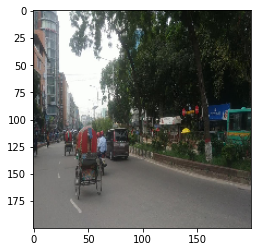

This is not a rickshaw.


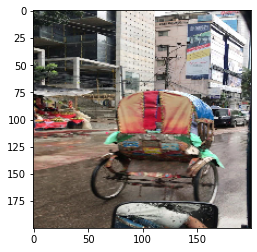

This is not a rickshaw.


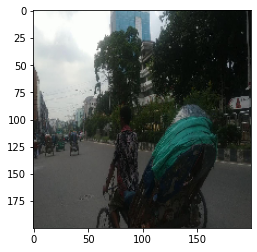

This is a rickshaw.


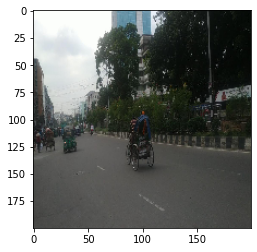

This is a rickshaw.


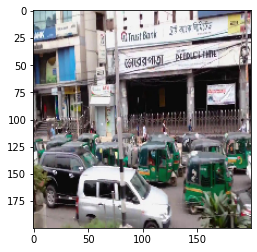

This is not a rickshaw.


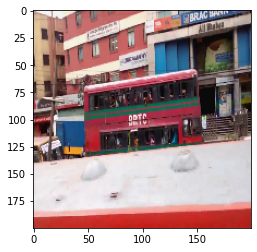

This is not a rickshaw.


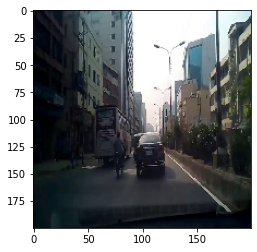

This is a rickshaw.


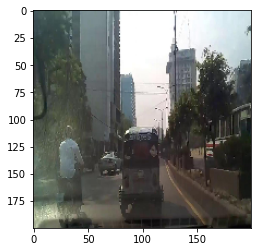

This is a rickshaw.


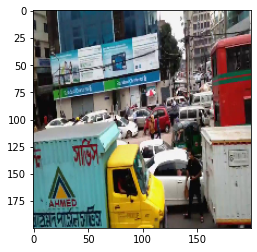

This is not a rickshaw.


In [ ]:
dir_path = '/content/drive/MyDrive/dhaka_data/test'

for i in os.listdir(dir_path):
  if i == '.ipynb_checkpoints':
    break
  img = image.load_img(dir_path+'//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])

  val = model.predict(images)
  if val == 0:
    print("This is a rickshaw.")
  else:
    print("This is not a rickshaw.")